# Table of Contents
 <p><div class="lev1 toc-item"><a href="#正規分布" data-toc-modified-id="正規分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正規分布</a></div><div class="lev2 toc-item"><a href="#期待値" data-toc-modified-id="期待値-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>期待値</a></div><div class="lev2 toc-item"><a href="#正規化定数" data-toc-modified-id="正規化定数-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>正規化定数</a></div><div class="lev2 toc-item"><a href="#密度関数のプロット" data-toc-modified-id="密度関数のプロット-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>密度関数のプロット</a></div><div class="lev2 toc-item"><a href="#乱数の生成" data-toc-modified-id="乱数の生成-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>乱数の生成</a></div><div class="lev1 toc-item"><a href="#多変量正規分布" data-toc-modified-id="多変量正規分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多変量正規分布</a></div><div class="lev2 toc-item"><a href="#密度関数のプロット" data-toc-modified-id="密度関数のプロット-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>密度関数のプロット</a></div><div class="lev2 toc-item"><a href="#乱数の生成" data-toc-modified-id="乱数の生成-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>乱数の生成</a></div><div class="lev2 toc-item"><a href="#最尤推定" data-toc-modified-id="最尤推定-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>最尤推定</a></div>

本ノートブックでは, 正規分布と多変量正規分布をnumpyで扱う方法を説明します. 具体的には, 密度関数のプロット, 乱数生成, パラメータの最尤推定を行います. 

コードの一部はコメントアウトされています. （コピペではなく）手で入力し, 実行結果を確認してください. 

ノートブックの目次を作成するため, [IPython-notebook-extensions](https://github.com/ipython-contrib/IPython-notebook-extensions)を使用しました. 動作に必須ではありません. 使い方は[はしくれエンジニアもどきのメモ「Jupyter notebookの拡張機能を使ってみる」](http://cartman0.hatenablog.com/entry/2016/03/28/170319#sec-enableFunction-TableOfContents)を参照してください. 

In [21]:
# 図をインラインで表示するように指定します. 
%matplotlib inline 

import numpy as np # Numpyモジュールをインポートします. as以降でnpという別名を与えます.
import matplotlib.pyplot as plt # Matplotlibモジュールをインポートします. pltという別名を与えます. 
import pandas as pd # Pandasモジュールをインポートします. pdという別名を与えます. 
import seaborn as sns # 図を綺麗に表示するモジュールです. 

# 正規分布

正規分布は最も良く利用される連続型確率分布の1つであり, その密度関数は次式となります. 

\begin{eqnarray}
p(x) &=& \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left[-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right]
\end{eqnarray}

ここで$x$は確率変数, $\mu$と$\sigma$は正規分布のパラメータであり, それぞれ平均と標準偏差を表します. 分散は$\sigma^{2}$です. 

## 期待値
平均$\mu$と分散$\sigma^{2}$はそれぞれ期待値として定義されます. ここでは期待値の定義を説明します. 

正規分布に限らず, 一般に確率変数の平均は次式で定義されます. 

\begin{eqnarray}
\mu &=& \int x\cdot p(x)dx
\end{eqnarray}

この式は確率変数$x$を密度関数$p(x)$で重み付けして和を取るとみなすことができます. 離散型確率分布の場合から直観的に類推することができると思います（例：サイコロの目の平均値）. 一般に, 確率変数の関数$f(x)$に対して, 密度関数$p(x)$で重み付けして和（積分）をとったものを$f(x)$の期待値と呼び, $E[f(x)]$と表します. 

\begin{eqnarray}
E\left[f(x)\right]\equiv\int f(x)\cdot p(x)dx
\end{eqnarray}

この式と平均の式を比べると, 平均は$x$の期待値であることが分かります. そして, 分散は$(x-E[x])^{2}$の期待値として定義されます. 式で書くと次のようになります. 

\begin{eqnarray}
\mu &\equiv& E[x] \\
\sigma^{2} &\equiv& E[(x-E[x])^{2}]
\end{eqnarray}

参考：正規分布の平均と分散の具体的な計算は[高校数学の美しい物語「正規分布の基礎的な知識まとめ」](http://mathtrain.jp/gaussdistribution)を参照してください. 

## 正規化定数
この式の先頭の分数$(2\pi\sigma^{2})^{-1/2}$は正規化定数と呼ばれます. 

離散型確率分布では, 確率分布関数$P(x)$の確率変数$x$に関する和は1です: $\sum_{x}P(x)=1$. このことは直観的に理解できると思います. これと同様に, 連続型確率分布では確率変数の積分値が1となります. 

\begin{eqnarray}
\int p(x)dx &=& 1
\end{eqnarray}

これより次式が成り立ちます. 

\begin{eqnarray}
\int\exp\left[-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right]dx &=& ?
\end{eqnarray}

確認：右辺を埋めてみましょう. 正規分布の定義から容易に分かると思います. 

参考：正規化定数の計算は[高校数学の美しい物語「正規分布の基礎的な知識まとめ」](http://mathtrain.jp/gaussdistribution)を参照してください. 

## 密度関数のプロット

まず, 密度関数を定義します. コメントアウトしている部分が正規分布の定義に対応することを確認しましょう. 

In [14]:
# `uvn`はunivariate normalを意味します. `pdf`はprobability density functionです. 
def uvn_pdf(x, mu=0, sigma=1):
    # z = np.sqrt(2 * np.pi) * sigma
    # return np.exp(-(x - mu)**2 / (2 * sigma**2)) / z

プロットします. 

In [15]:
# x = np.arange(-5, 5, 0.1)
# p = uvn_pdf(x, mu=0, sigma=1)
# plt.plot(x, p)

`mu`と`sigma`の値を変えてプロットしてください. 複数のパラメータ値に対する密度関数を重ね書きするとより分かりやすいでしょう. 

## 乱数の生成
平均0, 分散1の正規分布は標準正規分布と呼ばれます. Numpyには標準正規分布から乱数を生成する関数が用意されています. 

/Users/taku-y/anaconda/anaconda/envs/py35con/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


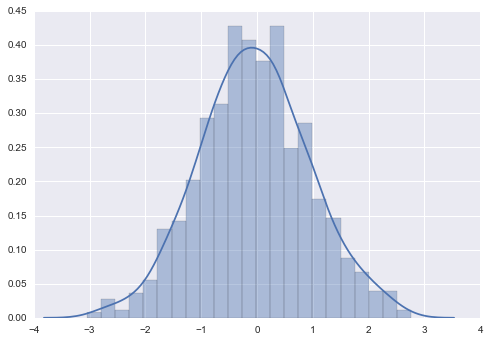

In [18]:
rng = np.random.RandomState(0) # 乱数生成器をシード0で初期化します
xs = rng.randn(1000) # 標準正規分布から100個の乱数を生成します. 
sns.distplot(xs) # ヒストグラムと推定された密度関数を重ねてプロットします. 

乱数の生成において, 平均値を指定する方法を考えます. そのためには次の定理を使用します. 

定理：（正規分布の一次式）：確率変数$X$がが正規分布に従うとき, $aX+b$も正規分布に従う. ただし$a, b$は任意の実数で$a\neq 0$とする. 

参考：証明は[高校数学の美しい物語「正規分布の標準化の意味と証明」](http://mathtrain.jp/normalnormal)を参照してください. 

$x$を平均0, 分散1の確率変数とします（確率分布は標準正規分布でなくても構いません）. 一次変換された確率変数の平均と分散は次式で与えられます. 

\begin{eqnarray}
E[(ax+b)] &=& b \\
E[((ax+b)-E[(ax+b)])^{2}] &=& a^{2}
\end{eqnarray}

確認：上の式が成り立つことを確認しましょう. 期待値の定義と（不定）積分の線形性：$\int\alpha f(x)+\beta g(x)dx=\alpha\int f(x)dx+\beta\int g(x)dx$を使用します. 

参考：不定積分の線形性の証明は[JSciencer「不定積分の性質」](http://jsciencer.com/higschmath/biseki/4144/)を参照してください. 

一次変換に伴う上記の定理と期待値計算を用いると, 平均$\mu$と分散$\sigma^{2}$を持つ正規分布に従う乱数は, 標準正規分布に従う乱数を$x$として$\sigma x+\mu$と表されることが分かります. 

/Users/taku-y/anaconda/anaconda/envs/py35con/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


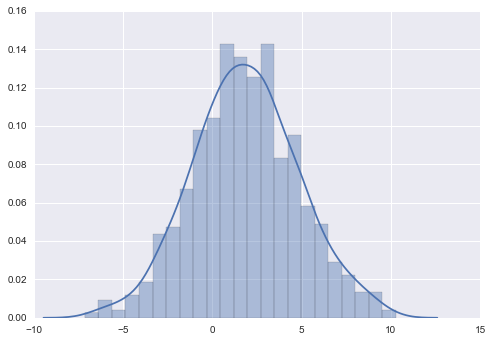

In [17]:
def uvn_sample(n_samples, rng, mu=0, sigma=1):
#     xs = rng.randn(n_samples)
#     return sigma * xs + mu

rng = np.random.RandomState(0)
# xs = uvn_sample(n_samples=1000, rng=rng, mu=2, sigma=3)

sns.distplot(xs)

# 多変量正規分布

$n$次元列ベクトルを$x$とすると, $n$次元多変量正規分布の確率密度関数は次式で定義されます. 

\begin{eqnarray}
p(x) &=& \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left[-\frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu)\right]
\end{eqnarray}

ここで$v'$はベクトルの転置を表します. $\mu$は平均を表す$n$次元列ベクトル, $\Sigma$は分散共分散行列を表す$n\times n$行列であり, 次式で定義されます. 

\begin{eqnarray}
\mu &=& E[x] \\
\Sigma &=& E[(x-\mu)(x-\mu)']
\end{eqnarray}

分散共分散行列の成分表示を調べます. 説明のため, 平均が$\mu=0$（$n$次元ゼロベクトル）の場合を考えてみます. このとき, $x-\mu=x$となります. つまり$\Sigma=E[(xx')]$となります. $x$は列ベクトルなので, その積$(xx')$の$i$行$j$列の成分$(xx')_{ij}$の期待値は

\begin{eqnarray}
E[(xx')_{ij}] &=& E[x_{i}x_{j}]
\end{eqnarray}

となります. これより分散共分散行列の対角成分は各成分$x_{i}$の分散と一致することが分かります. 

確認：$(xx')_{ij}$の成分表示が上の式の右辺のようになることを確認しましょう. 

定義より分散共分散行列は対称行列, すなわち$\Sigma=\Sigma'$であることが分かります. 正規分布では, $\Sigma$は対称であるだけではなく, 正定値行列である必要があります. 行列$M$が正定値行列であるとは, 任意の実非ゼロ列ベクトル$x\neq 0$に対して$x'Mx>0$であることと定義されます. $x$が実ベクトルの場合, $M$が対称行列であれば$x'Mx\geq 0$であることが知られています（等号を許す場合非負定値と呼ばれます）. $M$が対称であり, かつ行列のランクが$n$であれば（これは$M$に含まれる一次独立なベクトルの個数が$n$ということです）, $M$は正定値行列となります. $\Sigma$は対称かつ正定値なので, まとめて正定対称行列と呼ばれます.  

## 密度関数のプロット

定義に基づいて, 多変量正規分布の密度関数を計算する関数を作成します. 

In [13]:
def mvn_pdf(xs, mu, sigma):
    """多変量正規分布の確率密度関数の値を返します. 
    
    Parameters
    ----------
    xs : numpy.ndarray, shape=(n_samples, n)
        密度関数を計算するサンプル点. 行が各サンプル点, 列がベクトルの成分に対応します. 
    mu : numpy.ndarray, shape=(n,)
        平均ベクトル. 
    sigma : numpy.ndarray, shape=(n, n)
        分散共分散行列. 
        
    Return
    ------
    zs : numpy.ndarray, shape=(n_samples,)
        密度関数の値. 
    """
    assert(xs.ndim == 2)
    n = xs.shape[1]
    assert(mu.shape == (n,))
    assert(sigma.shape == (n, n))
    
    # np.linalg.inv()で逆行列を計算できます. 
    #sigma_inv = np.linalg.inv(sigma)
    
    # np.linalg.det()で行列式の値を計算できます. 
    #z = np.sqrt(((2 * np.pi)**n) * np.linalg.det(sigma))
    
    # ブロードキャストが適用されます. 
    #d = (xs - mu)
    
    # expの中で, (x-mu)'M(x-mu)をxsのサンプル点ごとに計算することに注意します. 
    #zs = 1 / z * np.exp(-0.5 * np.sum(d.dot(sigma_inv) * d, axis=1))
    
    return zs

この関数を用いて二次元正規分布の等高線図をプロットします. 

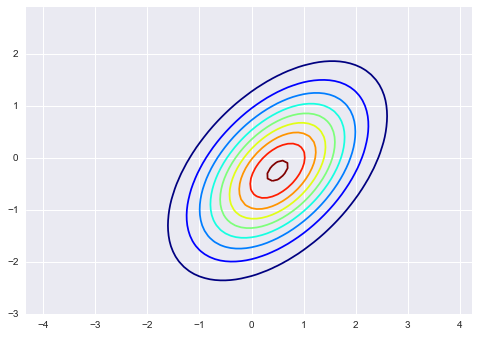

In [20]:
# メッシュの作成
x_ = np.arange(-3, 3, 0.1)
y_ = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x_, y_)

# xとyをまとめて二次元ベクトル集合に変換します. 
xs = np.vstack((x.ravel(), y.ravel())).T

mu = np.array([0.5, -0.25])
sigma = np.array([[1.0, 0.5], [0.5, 1.0]])
zs = mvn_pdf(xs, mu, sigma)

# 元のx（またはy）のサイズと合うようにメッシュ状に変換します. 
z = zs.reshape(x.shape)

plt.jet() # jetカラーマップ
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.contour(x, y, z, 10) # 最後の数値は等高線の数です.
ax1.set_aspect('equal', 'datalim')

## 乱数の生成

平均0, 分散共分散行列が単位行列$I$の$n$次元正規分布を, 1次元の場合と同様に標準正規分布と呼びます. 多次元正規分布の密度関数に$\mu=0$, $\Sigma=I$を代入すると, 次式が得られます. 

\begin{eqnarray}
p(x) &=& \frac{1}{(2\pi)^{n/2}}\exp\left[-\frac{1}{2}x'x\right]
\end{eqnarray}

$\exp$の中はベクトルの内積であり, $x'x=\sum_{i=1}^{n}x_{i}^2$となります. また, $\exp(a+b)=\exp(a)\cdot\exp(b)$なので, 次式が成り立ちます. 

\begin{eqnarray}
\frac{1}{(2\pi)^{n/2}}\exp\left[-\frac{1}{2}x'x\right] &=& \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}}\exp\left[-\frac{x_{i}^{2}}{2}\right]
\end{eqnarray}

したがって, 多変量の標準正規分布は1変数の標準正規分布の積の形で表されます. 

確認：この式が成り立つことを確認しましょう. 

では, 二変量の標準正規分布から乱数を生成し, プロットしてみましょう. 

/Users/taku-y/anaconda/anaconda/envs/py35con/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


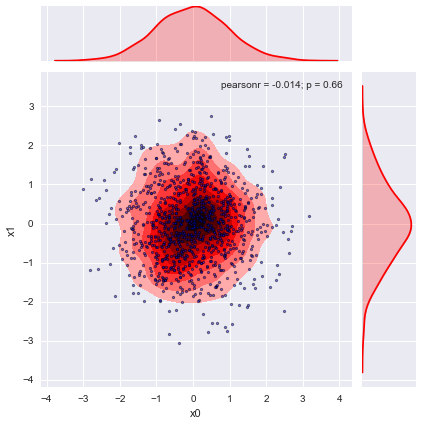

In [30]:
def smvn_sample(n_samples, n, rng):
#     return rng.randn(n_samples * n).reshape(n_samples, n)
    return rng.randn(n_samples * n).reshape(n_samples, n)

n_samples = 1000
n = 2
rng = np.random.RandomState(0)
xs = smvn_sample(n_samples, n, rng)

# Seabornを使うため, サンプル集合をPandasのデータフレームに格納します. 
df = pd.DataFrame({'x0': xs[:, 0], 'x1': xs[:, 1]})

g = sns.jointplot(x="x0", y="x1", data=df, kind="kde", color='r')
g.plot_joint(plt.scatter, c="b", s=5, linewidth=1, alpha=0.5)
g.ax_joint.collections[0].set_alpha(0)

参考：様々な分布のプロットについて[Visualizing the distribution of a dataset](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)を参照してください. 

## 最尤推定